# **TEAM 61**

**Our model is able to resolute the given image by 16 times**

In [ ]:
!pip install basicsr
!pip install realesrgan
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

**Mount the Google Drive**

In [ ]:
from google.colab import drive  
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**This function displays the Input Image and the Super Resoluted Image**

In [ ]:
def display_images(img1 , img2 , cmap = "gray" ):
  fig = plt.figure(figsize = (20 ,8))
  ax1 = plt.subplot(1 , 2, 1)
  plt.imshow(img1 , cmap = cmap)
  ax1.axis("off")
  ax1.set_title("Input Image" , fontsize = 20 , fontweight = "bold")
  ax2 = plt.subplot(1 , 2, 2)
  plt.imshow(img2 , cmap = cmap)
  ax2.axis("off")
  ax2.set_title("Model Output" , fontsize = 20 , fontweight = "bold");

In [ ]:
%cd /content/drive/MyDrive/Real-ESRGAN-master

/content/drive/MyDrive/_Final_Submission_/Real-ESRGAN-master


**Here we create the Upsampler Class which Super Resolutes our image**




In [ ]:
from inference_realesrgan import RealESRGANer
from basicsr.archs.rrdbnet_arch import RRDBNet

In the **model_path** we must mention the path of the **Model.pth** 


In [ ]:
netscale = 3.5
model_path = "/content/drive/MyDrive/Real-ESRGAN-master/experiments/finetune_RealESRGANx4plus_400k_pairdata/models/net_g_latest.pth"
dni_weight = 0.5
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

In [ ]:
upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=dni_weight,
        model=model,
        tile=0,
        tile_pad=10,
        pre_pad=0,
        half = "_fp16",
        gpu_id=None)

This function  returns **16X** image ( as a numpy array ) of the Input Image

The *enhance* function is the main function of the **Umsampler class**  which Super Resolutes the image

The *enhance* function return a **tuple** containing 
2 objects :-

Object 1 - The Super Resoluted np array

Object 2 - The channels of the Image e.g. **"l"** , **"rgb"** 

In [ ]:
def model(nar):
  """
  This function  returns 16X image ( as a numpy array ) of the Input Image
  """
  sr_nar = upsampler.enhance(nar)[0]
  sr_nar = upsampler.enhance(sr_nar)[0]
  return sr_nar

The **Super_res** function takes the path of the image as **input_path**  and breaks the image into smaller sub-images and calls the **Upsampler.enhance** function and finally patchifies all the resoluted sub-images into one and saves it to the **output_path** 

In [ ]:
def Super_res(input_path, output_path ):
    img = Image.open(input_path)
    l_size = 100
    n1 = np.asarray(img)
    h = n1.shape[0]
    w = n1.shape[1]
    h=h-h%100
    w=w-w%100
    final = np.zeros(shape=(16*h, 16*w))
    h=int(h/100)
    w=int(w/100)
    for i in range(0, h):
        for j in range(0, w):
            tile = n1[i*l_size:(i+1)*l_size, j*l_size:(j+1)*l_size]
        
            x = model(tile)
            if(len(x.shape) == 3):
              final[i*l_size*16:(i+1)*l_size*16, j*l_size*16:(j+1)*l_size*16]=x[: , :, 0]
            else:
              final[i*l_size*16:(i+1)*l_size*16, j*l_size*16:(j+1)*l_size*16]=x
    try:
        cv2.imwrite(output_path , final)
        display_images(n1, final)
        print("image saved!")
    except:
        print("an error occured while resoluting the input image")

image saved!


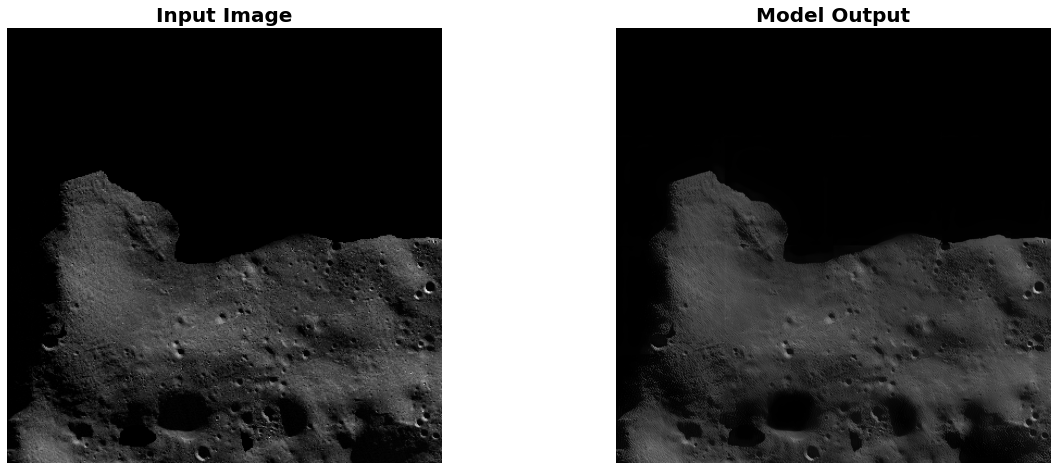

In [ ]:
# Please provide the input image path in the **image_input_path** 
# Please provide the output image path in the **image_output_path**
image_input_path = "/content/drive/MyDrive/tmc-batch/tmc102.png"
image_output_path = "/content/drive/MyDrive/tmc-batch/tmc122.png"
Super_res(image_input_path , image_output_path)